## Домашнее задание 

### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [2]:
# -- ВАШ КОД ТУТ --
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

# данные получены с помощью функции make_classification 
with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

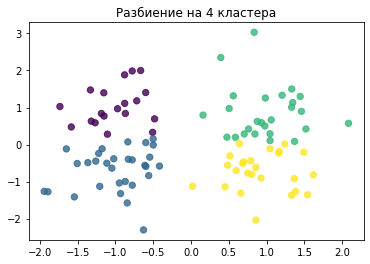

In [3]:
# Обучаем модель, предполагая наличие 4х кластеров

kmeans_model = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.title('Разбиение на 4 кластера')
plt.show()

In [4]:
score = silhouette_score(X, kmeans_model.labels_)
print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.442


### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [5]:
# -- ВАШ КОД ТУТ --
score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % score)


Качество кластеризации по метрике AMI 0.583


### Задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [6]:
# -- ВАШ КОД ТУТ --
import pandas as pd

data_hw = pd.read_csv('data/clustering_hw.csv')
X = np.array(data_hw[['x1','x2']])
Y = np.array(data_hw['y'])

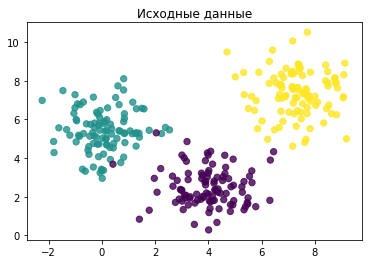

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.title('Исходные данные')
plt.show()

In [8]:
# Пробую обучать модель с разным количеством кластеров, и смотрю метрику
best_score = -1
best_k = 0
for k in range(2,11):
    kmeans_model = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans_model.labels_)
    print(f'На итерации {k} метрика силуэта {round(score, 3)}')
    if score > best_score:
        best_score = score
        best_k = k
print(f'Лучший результат: {best_k} кластеров с метрикой силуэта {round(best_score, 3)}')

На итерации 2 метрика силуэта 0.564
На итерации 3 метрика силуэта 0.651
На итерации 4 метрика силуэта 0.528
На итерации 5 метрика силуэта 0.41
На итерации 6 метрика силуэта 0.324
На итерации 7 метрика силуэта 0.335
На итерации 8 метрика силуэта 0.335
На итерации 9 метрика силуэта 0.342
На итерации 10 метрика силуэта 0.352
Лучший результат: 3 кластеров с метрикой силуэта 0.651


In [9]:
# Получаем модель для варианта с наилучшей метрикой
kmeans_model = KMeans(n_clusters=best_k, random_state=42).fit(X)

In [10]:
test_data = [[5, 8]]
print(f'Для точки {test_data} предсказанный кластер {kmeans_model.predict(test_data)[0]}')

test_data = [[0,5]]
print(f'Для точки {test_data} предсказанный кластер {kmeans_model.predict(test_data)[0]}')

Для точки [[5, 8]] предсказанный кластер 1
Для точки [[0, 5]] предсказанный кластер 0


Данные точки принадлежат к разным кластерам

In [11]:
# Теперь используем ментрику AMI
score = adjusted_mutual_info_score(
    Y, kmeans_model.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.970


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)